In [2]:
# Importing the libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#import dataset
X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
268,66.0,2.0,34.6,115.00,204.0,139.4,36.0,6.00,4.9628,109.0
170,55.0,2.0,24.5,84.00,179.0,105.8,66.0,3.00,3.5835,87.0
384,58.0,2.0,23.6,96.00,257.0,171.0,59.0,4.00,4.9053,82.0
118,33.0,2.0,25.4,102.00,206.0,141.0,39.0,5.00,4.8675,105.0
27,42.0,1.0,31.9,83.00,158.0,87.6,53.0,3.00,4.4659,101.0
...,...,...,...,...,...,...,...,...,...,...
380,53.0,1.0,28.8,111.67,145.0,87.2,46.0,3.15,4.0775,85.0
310,47.0,1.0,32.4,105.00,188.0,125.0,46.0,4.09,4.4427,99.0
389,47.0,2.0,26.5,70.00,181.0,104.8,63.0,3.00,4.1897,70.0
43,54.0,1.0,24.2,74.00,204.0,109.0,82.0,2.00,4.1744,109.0


In [5]:
print(X_train.head())
print(y_train.head())

      age  sex   bmi     bp     s1     s2    s3   s4      s5     s6
268  66.0  2.0  34.6  115.0  204.0  139.4  36.0  6.0  4.9628  109.0
170  55.0  2.0  24.5   84.0  179.0  105.8  66.0  3.0  3.5835   87.0
384  58.0  2.0  23.6   96.0  257.0  171.0  59.0  4.0  4.9053   82.0
118  33.0  2.0  25.4  102.0  206.0  141.0  39.0  5.0  4.8675  105.0
27   42.0  1.0  31.9   83.0  158.0   87.6  53.0  3.0  4.4659  101.0
268    264.0
170     47.0
384     69.0
118    179.0
27      85.0
Name: target, dtype: float64


In [7]:

def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()

### 2. Run a multivariate linear regression on all variables

In [16]:
# Train the model
linear_regression_Model = LinearRegression()  
#fit the model with training sets
linear_regression_Model.fit(X_train, y_train)

LinearRegression()

Test Dataset: Mean Absolute Error: 42.08
Train Dataset: Mean Absolute Error: 43.60
y = 0.12 * x_0 + -26.14 * x_1 + 5.41 * x_2 + 1.27 * x_3 + -1.13 * x_4 + 0.79 * x_5 + 0.37 * x_6 + 5.84 * x_7 + 67.90 * x_8 + 0.32 * x_9 + -340.10


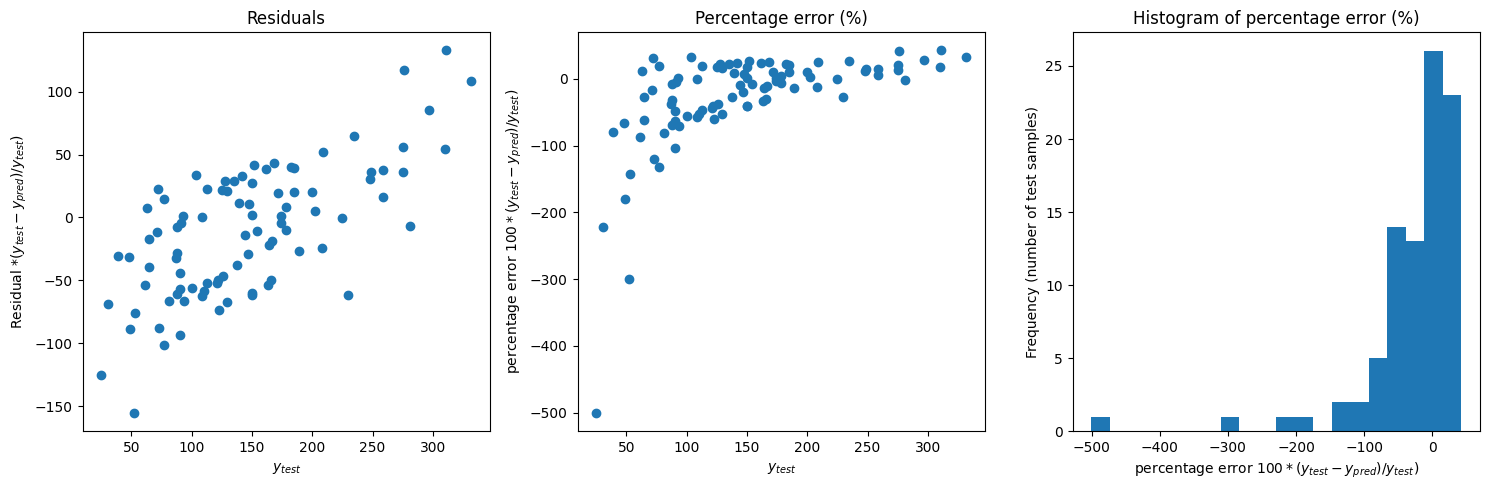

In [17]:
linear_y_pred_train = linear_regression_Model.predict(X_train)
linear_y_pred_test =  linear_regression_Model.predict(X_test)
model_estimation(linear_regression_Model, y_train, y_test, linear_y_pred_train, linear_y_pred_test)

3. Run a multivariate polynomial regression of the 2nd degree on all variable 

In [26]:
#Used pipeline here to solve the polynomial regression 
polynomialModels = Pipeline([('polynomial', PolynomialFeatures(degree=2)), 
                  ('linear', LinearRegression())])
polynomialModels.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('linear', LinearRegression())])

Test Dataset: Mean Absolute Error: 46.24
Train Dataset: Mean Absolute Error: 39.89
y = -144570756860.63 * x_0 + -8.53 * x_1 + -23.35 * x_2 + -34.85 * x_3 + 1.07 * x_4 + -6.28 * x_5 + 13.24 * x_6 + -4.12 * x_7 + -103.87 * x_8 + -932.93 * x_9 + -3.91 * x_10 + 0.04 * x_11 + 0.31 * x_12 + -0.08 * x_13 + 0.02 * x_14 + -0.00 * x_15 + 0.00 * x_16 + -0.02 * x_17 + -0.84 * x_18 + 1.47 * x_19 + 0.03 * x_20 + -70.04 * x_21 + 1.24 * x_22 + 0.52 * x_23 + 0.24 * x_24 + 0.49 * x_25 + 0.42 * x_26 + -12.74 * x_27 + 14.14 * x_28 + -0.37 * x_29 + 0.02 * x_30 + 0.14 * x_31 + -0.42 * x_32 + 0.39 * x_33 + 0.41 * x_34 + 0.22 * x_35 + 7.52 * x_36 + 0.06 * x_37 + -0.01 * x_38 + 0.02 * x_39 + -0.02 * x_40 + -0.02 * x_41 + -0.24 * x_42 + 0.47 * x_43 + -0.05 * x_44 + -0.02 * x_45 + 0.05 * x_46 + 0.15 * x_47 + 0.41 * x_48 + -1.35 * x_49 + 0.07 * x_50 + -0.02 * x_51 + -0.23 * x_52 + -1.29 * x_53 + 0.38 * x_54 + -0.07 * x_55 + -0.04 * x_56 + 2.07 * x_57 + -0.03 * x_58 + -0.04 * x_59 + 10.48 * x_60 + 6.92 * x_61 + 0.

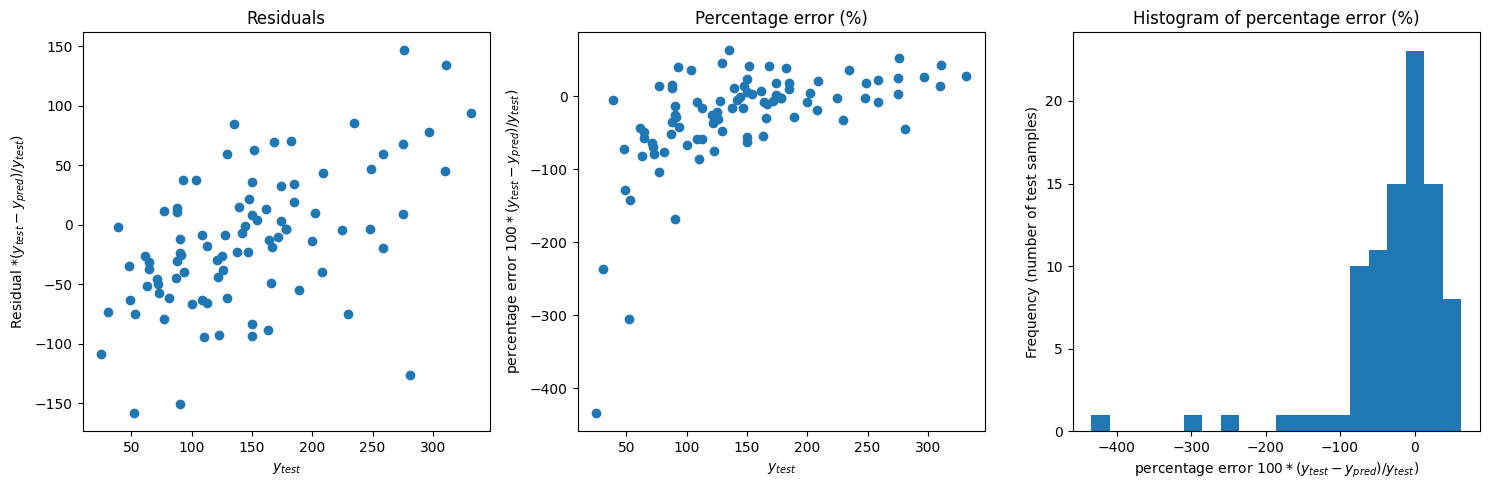

In [11]:
poly_y_pred_train = polynomialModels.predict(X_train)
poly_y_pred_test =  polynomialModels.predict(X_test)
model_estimation(polynomialModels[1], y_train, y_test, poly_y_pred_train, poly_y_pred_test)

In [20]:
print(f'MAE of Linear Regression is {metrics.mean_squared_error(y_test, linear_y_pred_test)} ')
print(f'MAPE of Linear Regression is {metrics.mean_absolute_error(y_test, linear_y_pred_test):.2f}%')
print(f'MAE MAPE of Polynomial Regression is {metrics.mean_squared_error(y_test, poly_y_pred_test)}')
print(f'MAPE of Polynomial Regression is {metrics.mean_absolute_error(y_test, poly_y_pred_test):.2f}%')

MAE of Linear Regression is 2787.643402443913 
MAPE of Linear Regression is 42.08%
MAE MAPE of Polynomial Regression is 3456.2489901957197
MAPE of Polynomial Regression is 46.24%


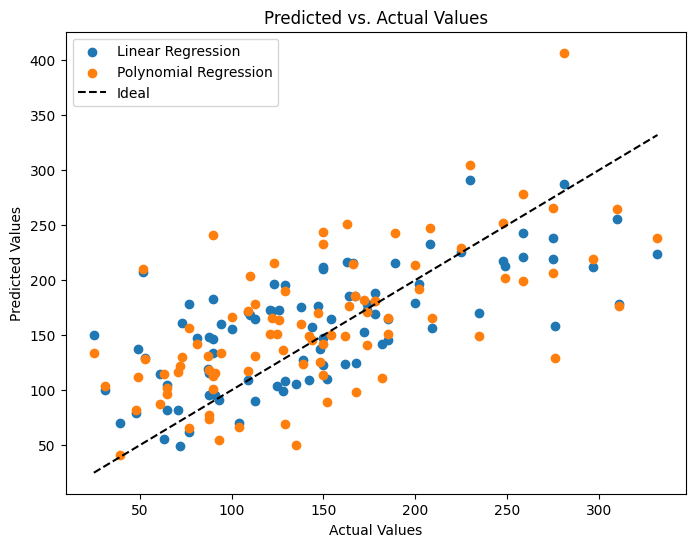

In [25]:
# plot linear and polynomial egression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_y_pred_test, label='Linear Regression')
plt.scatter(y_test, poly_y_pred_test, label='Polynomial Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()


**QUESTION AND ANSWERS**

1.How many parameters are we fitting for in linear regression and in the polynomial regression? Explain these values. Hint: for explaining the parameters of the polynomial regression, you can use poly.get_feature_names_out().

Based on the analysis, we can see that the linear model (linear_model) is fitted with 10 parameters. These parameters represent the original independent variables in the dataset, and they serve as the direct inputs to the linear model.

On the other hand, when the features of X_train are transformed into polynomial features of degree 2 using PolynomialFeatures, the transformed training set (X_train_poly) contains 65 features. The increase in the number of features is due to the inclusion of interaction terms among the independent variables. These interaction terms capture the interactions between the original features, resulting in an expanded set of features.

To summarize, the polynomial model (poly_model) is fitted with 65 parameters, corresponding to the 65 features generated through the polynomial transformation. These features include both the original independent variables and the interaction terms. This allows the model to capture more complex relationships between the variables.

In [18]:

poly_features=PolynomialFeatures(degree = 2, include_bias=False)
poly_features.fit(X_train, y_train)
poly_features.get_feature_names_out()

65

2.Which model would you choose for deployment, and why?

Out of the 65 features obtained through the polynomial transformation, 10 of them correspond to the original features: age, sex, bmi, bp, s1, s2, s3, s4, s5, and s6. These features serve as direct inputs and individually contribute to the effects on the dependent variable.

Another set of 10 features consists of second-degree terms of the original features, such as age^2, sex^2, bmi^2, bp^2, and so on. These features capture the quadratic relationships between the original variables and allow the model to consider non-linear effects.

The remaining 45 features are interaction terms that represent the pairwise interactions between the independent variables. For instance, age multiplied by bmi, sex multiplied by bp, and the product of s1 and s2 are examples of these interaction terms.

3.What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?

Based on the given mean absolute error (MAE) and mean absolute percentage error (MAPE) values, we can compare the performance of the linear regression model (linear_model) and the polynomial regression model (poly_model).

Lower values of MAE and MAPE indicate better accuracy for a model. When comparing the MAE and MAPE values of both models, we can observe that the linear regression model (linear_model) has slightly lower values compared to the polynomial regression model (poly_model). This suggests that the linear regression model performs slightly better in predicting the target variable.

Considering these metrics and the fact that the linear regression model exhibits slightly superior performance across various evaluation criteria, the **linear_model** might be preferred for deployment. It offers a simpler model with slightly better accuracy and lower error values.

However, it is important to note that the difference in performance between the two models is relatively small.